In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../")

In [2]:
from steric_free_simulator import Optimizer
from steric_free_simulator import ReactionNetwork

/home/spencerloggia/Projects/biphy/multi_assembly/steric_free_simulator/energy_space_explorer.py:8: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.relax import *


<h2> Load basic dimer info </h2>
Specifies reaction A + B <--> AB, with starting with 2000 copies of A and 1000 copies of B

In [3]:
base_input = './input_files/dimer.bngl'
rn = ReactionNetwork(base_input, one_step=True)


Since this is a toy model, assign some random $\Delta G$ to the reaction.

In [4]:
rn.initialize_random_energy(percent_negative=-.75, score_range=10000)
rn.reset()
rn.intialize_activations()


<h2>Create an optimizer object to attempt to optimize this reaction network</h2>
Since we are running vectorized simulations here, the reaction network will be transformed into a matrix representation.
Due to of optimization details, I optimize with respect to activation energies instead of k_on. Basically, this is because creating a vector
where some elements are used to compute other elements creates a loop in the gradient computation graph, which must be acyclic.

In [6]:
# I am using an adam optimizer, which will chhose the best
# learning rate and momentum parameters as the simulations run,
# So the initial choice of learning rate doesn't matter that much

optim = Optimizer(reaction_network=rn,
                  sim_runtime=.001,
                  optim_iterations=10,
                  learning_rate=10,
                  sim_mode='vectorized')

In [7]:
vec_rn = optim.optimize()

yield on sim iteration 0 was 66.4%
param update: tensor([6.0911e-12], dtype=torch.float64)
yield on sim iteration 1 was 66.4%
param update: tensor([6.5103e-12], dtype=torch.float64)
yield on sim iteration 2 was 66.4%
param update: tensor([2.4407e-12], dtype=torch.float64)
yield on sim iteration 3 was 66.4%
param update: tensor([3.6682e-13], dtype=torch.float64)
yield on sim iteration 4 was 66.4%
param update: tensor([-2.2835e-12], dtype=torch.float64)
yield on sim iteration 5 was 66.4%
param update: tensor([-2.1529e-12], dtype=torch.float64)
yield on sim iteration 6 was 66.4%
param update: tensor([-9.0861e-13], dtype=torch.float64)
yield on sim iteration 7 was 66.4%
param update: tensor([1.3687e-12], dtype=torch.float64)
yield on sim iteration 8 was 66.4%
param update: tensor([6.3771e-13], dtype=torch.float64)
yield on sim iteration 9 was 66.4%
optimization complete


<h3> Plot the simulation at the first iteration (before optimization) </h3>

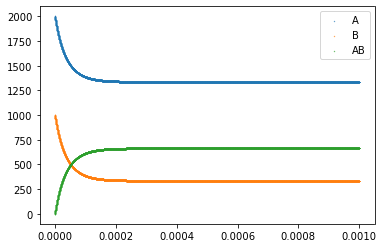

In [8]:
optim.plot_observable(iteration=0)


<h3> Plot the simulation at the last iteration (after all optimization) </h3>

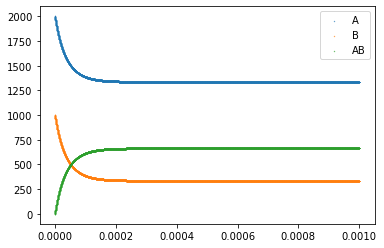

In [9]:
optim.plot_observable(iteration=-1)


<h3> Plot the yield curve over all iterations </h3>

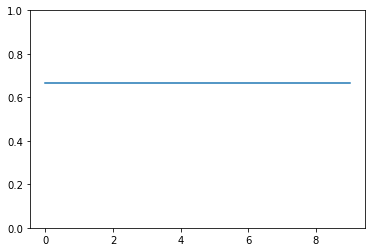

In [10]:
optim.plot_yield()

<h3> Summary of dimer test</h3>
The dimer model, with randomly asssigned reaction free energies, reaches the same equilbrium regardless of the parameters.

<h2> Load basic Trimer info </h2>
Specifies reactions

 - A + B <--> AB
 - B + C <--> BC
 - A + C <--> AC
 - AB + C <--> ABC
 - BC + A <--> ABC
 - AC + B <--> ABC

With starting copy numbers of:

 - A: 1000
 - B: 1000
 - C: 1000

In [11]:
base_input = './input_files/trimer.bngl'
rn = ReactionNetwork(base_input, one_step=True)

Since this is a toy model, assign some random $\Delta Gs$ to each reaction.

In [12]:
rn.initialize_random_energy(percent_negative=.2, score_range=100)
rn.reset()
rn.intialize_activations()

<h2>Create an optimizer object to attempt to optimize this reaction network</h2>

In [13]:
optim = Optimizer(reaction_network=rn,
                  sim_runtime=.1,
                  optim_iterations=20,
                  learning_rate=10,
                  sim_mode='vectorized')

In [14]:
vec_rn = optim.optimize()


yield on sim iteration 0 was 81.6%
param update: tensor([ 7.3185, -9.5400, -9.1068,  9.2430,  8.6970,  9.0313],
       dtype=torch.float64)
yield on sim iteration 1 was 81.6%
param update: tensor([7.3126, 7.4414, 7.4414, 9.2483, 8.7041, 9.0381], dtype=torch.float64)
yield on sim iteration 2 was 81.6%
param update: tensor([7.2473, 5.7522, 5.7522, 9.2582, 8.7245, 9.0514], dtype=torch.float64)
yield on sim iteration 3 was 81.6%
param update: tensor([7.1593, 4.7119, 4.7119, 9.2708, 8.7499, 9.0681], dtype=torch.float64)
yield on sim iteration 4 was 81.6%
param update: tensor([7.0581, 3.9826, 3.9826, 9.2852, 8.7781, 9.0869], dtype=torch.float64)
yield on sim iteration 5 was 81.6%
param update: tensor([6.9413, 3.4325, 3.4325, 9.3019, 8.8094, 9.1084], dtype=torch.float64)
yield on sim iteration 6 was 81.6%
param update: tensor([6.8123, 2.9976, 2.9976, 9.3203, 8.8428, 9.1318], dtype=torch.float64)
yield on sim iteration 7 was 81.6%
param update: tensor([6.6702, 2.6426, 2.6426, 9.3405, 8.8784, 9

<h3> Plot the simulation at the first iteration (before optimization) </h3>

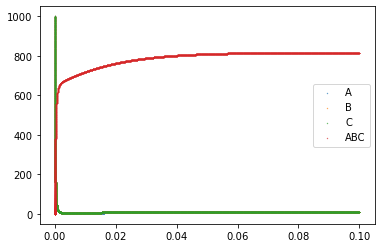

In [15]:
optim.plot_observable(iteration=0)

<h3> Plot the simulation at the last iteration (after all optimization) </h3>

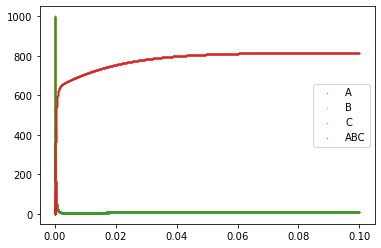

In [16]:
optim.plot_observable(iteration=-1)

<h3> Plot the yield curve over all iterations </h3>

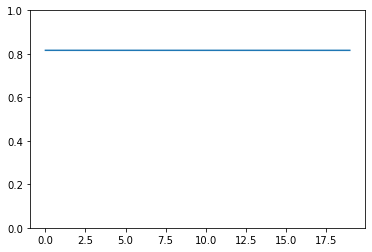

In [17]:
optim.plot_yield()

<h3> Summary of Trimer test</h3>
The trimer model, with randomly asssigned reaction free energies, reaches the same equilbrium regardless of the parameters.


<h2> AP2 Optimization </h2>
See the ap2_optimization ipython notebook in this repo
